# Contaminant Clustering

## Simple Clustering

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# for inline plots in jupyter
%matplotlib inline

import numpy as np
import math

In [2]:
import datetime

import numpy as np

%load_ext autoreload
%autoreload 2

In [3]:
from popsborder.consignments import Box, Consignment
from popsborder.inputs import load_configuration_yaml_from_text
from popsborder.contamination import add_contaminant_clusters
from popsborder.outputs import pretty_consignment

In [4]:
def plot_binned_distribution(
    ax,
    all_values,
    num_consignments,
    placement_adjustment,
    clustering,
    contamination_rate,
    num_bins=20,
    palette="viridis",
):
    """
    Plots a binned bar chart of contaminated items over consignments.
    
    Parameters:
        all_values (np.ndarray): Array of values representing contaminated items.
        num_consignments (int): Number of consignments.
        placement_adjustment: Placement adjustment method
        clustering: Clustering number
        contamination_rate: Contamination rate
        num_bins (int): Number of bins to use for aggregation (default: 20).
        palette (str): Seaborn color palette for the bars (default: "viridis").
    """
    x = np.arange(len(all_values))
    num_bins = min(num_bins, len(x))
    bins = np.linspace(x.min(), x.max(), num_bins + 1)
    # Assign each x to a bin.
    bin_indices = np.digitize(x, bins)

    # Accumulate the y-values for each bin.
    binned_values = np.zeros(num_bins)
    x_labels = []
    for i in range(1, num_bins + 1):
        # Find the original x values in this bin.
        x_in_bin = x[bin_indices == i]
        # Sum y-values in each bin.
        binned_values[i - 1] = all_values[bin_indices == i].sum()
        # Use the first x value for labeling.
        x_labels.append(x_in_bin[0] if len(x_in_bin) > 0 else None)

    # Filter out empty bins if necessary.
    valid_indices = [i for i, label in enumerate(x_labels) if label is not None]
    x_labels = [f"{x_labels[i]}" for i in valid_indices]
    binned_values = np.array([binned_values[i] for i in valid_indices])

    # Plot
    sns.barplot(ax=ax, x=x_labels, y=binned_values, hue=x_labels, legend=False, palette=palette)
    ax.set_title(
        f"Distribution of contaminated items over {num_consignments} consignments\n"
        f"placement adjustment: {placement_adjustment}, clustering: {clustering},"
        f" contamination rate: {contamination_rate}"
    )
    ax.set_xlabel(f"Position in a consignment (divided into {num_bins} bins for plotting)")
    ax.set_ylabel("Number of shipments with a contaminated item")
    # Set the rotation for x-axis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

In [5]:
def get_consignment(num_items):
    """Get basic consignment with given number of items all in one box"""
    items = np.zeros(num_items, dtype=int)
    return Consignment(
        flower="Rosa",
        date=datetime.date(2018, 2, 15),
        origin="Mexico",
        port="FL Miami Air CBP",
        num_items=num_items,
        items=items,
        num_boxes=1,
        boxes=[Box(items)],
        items_per_box=num_items,
        pathway="air",
    )

In [6]:
config_yaml = """
contamination:
    contamination_rate:
        distribution: fixed_value
        value: {contamination_rate}
    contamination_unit: item
    arrangement: clustered
    clustered:
        distribution: subset
        placement_adjustment: {placement_adjustment}
        clustering: {clustering}
"""

In [7]:
def simulate(config):
    contamination_rate = config["contamination_rate"]["value"]
    num_items = 10000
    num_consignments = 50000
    all_values = np.zeros(num_items)
    for i in range(num_consignments):
        consignment = get_consignment(num_items)
        add_contaminant_clusters(config, consignment)
        contaminated_items = int(num_items * contamination_rate)
        if placement_adjustment == "cut":
            assert np.count_nonzero(consignment.items) <= contaminated_items
        else:
            assert np.count_nonzero(consignment.items) == contaminated_items
        all_values += consignment.items
    ax = axes.flatten()[placement_number]
    plot_binned_distribution(ax, all_values, num_consignments=100, contamination_rate=contamination_rate, placement_adjustment=placement_adjustment, clustering=config["clustered"]["clustering"])

split
shift
contain
cut


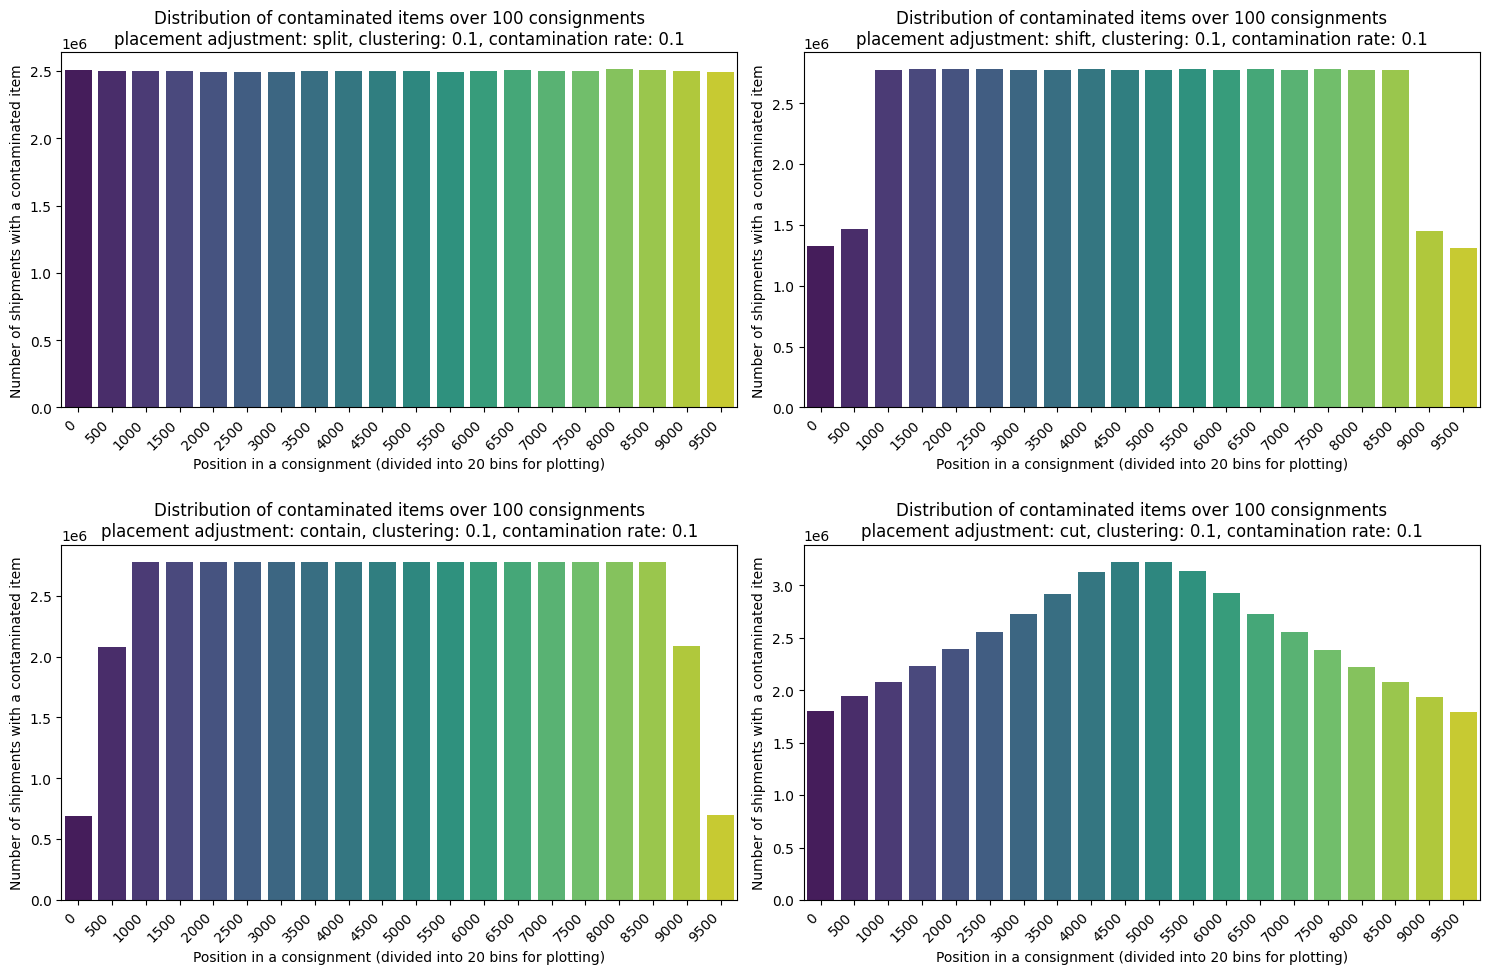

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for placement_number, placement_adjustment in enumerate(["split", "shift", "contain", "cut"]):
    print(placement_adjustment)
    config = load_configuration_yaml_from_text(
        config_yaml.format(
            contamination_rate=0.1,
            placement_adjustment=placement_adjustment,
            clustering=0.1,
            )
    )["contamination"]
    simulate(config)
plt.tight_layout()
plt.show()

split
shift
contain
cut


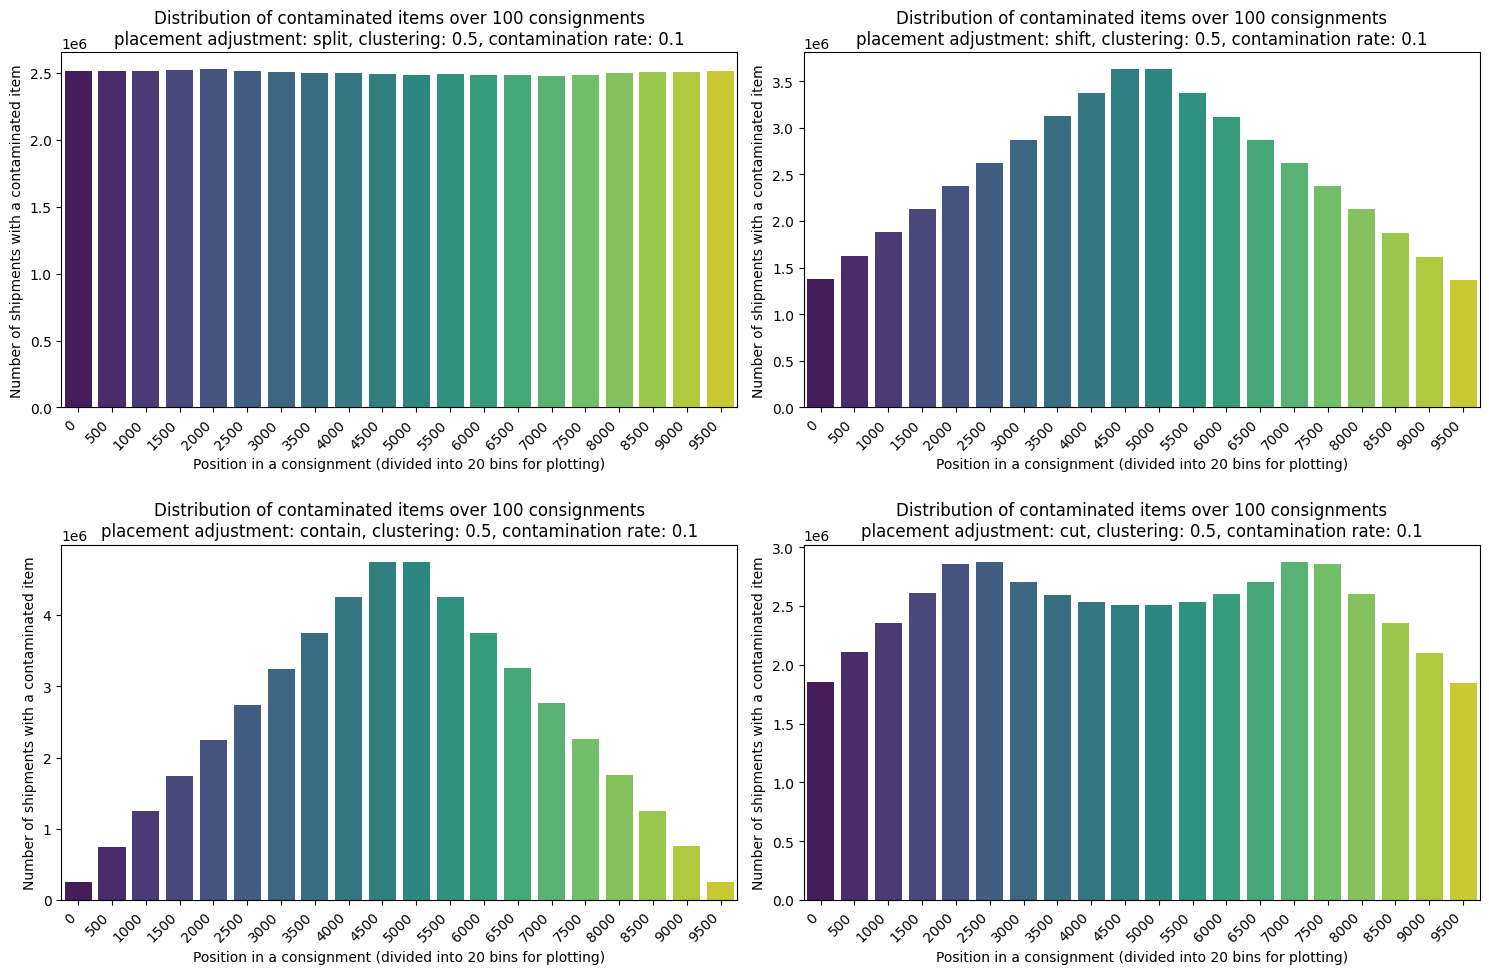

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for placement_number, placement_adjustment in enumerate(["split", "shift", "contain", "cut"]):
    print(placement_adjustment)
    config = load_configuration_yaml_from_text(
        config_yaml.format(
            contamination_rate=0.1,
            placement_adjustment=placement_adjustment,
            clustering=0.5,
            )
    )["contamination"]
    simulate(config)
plt.tight_layout()
plt.show()

split
shift
contain
cut


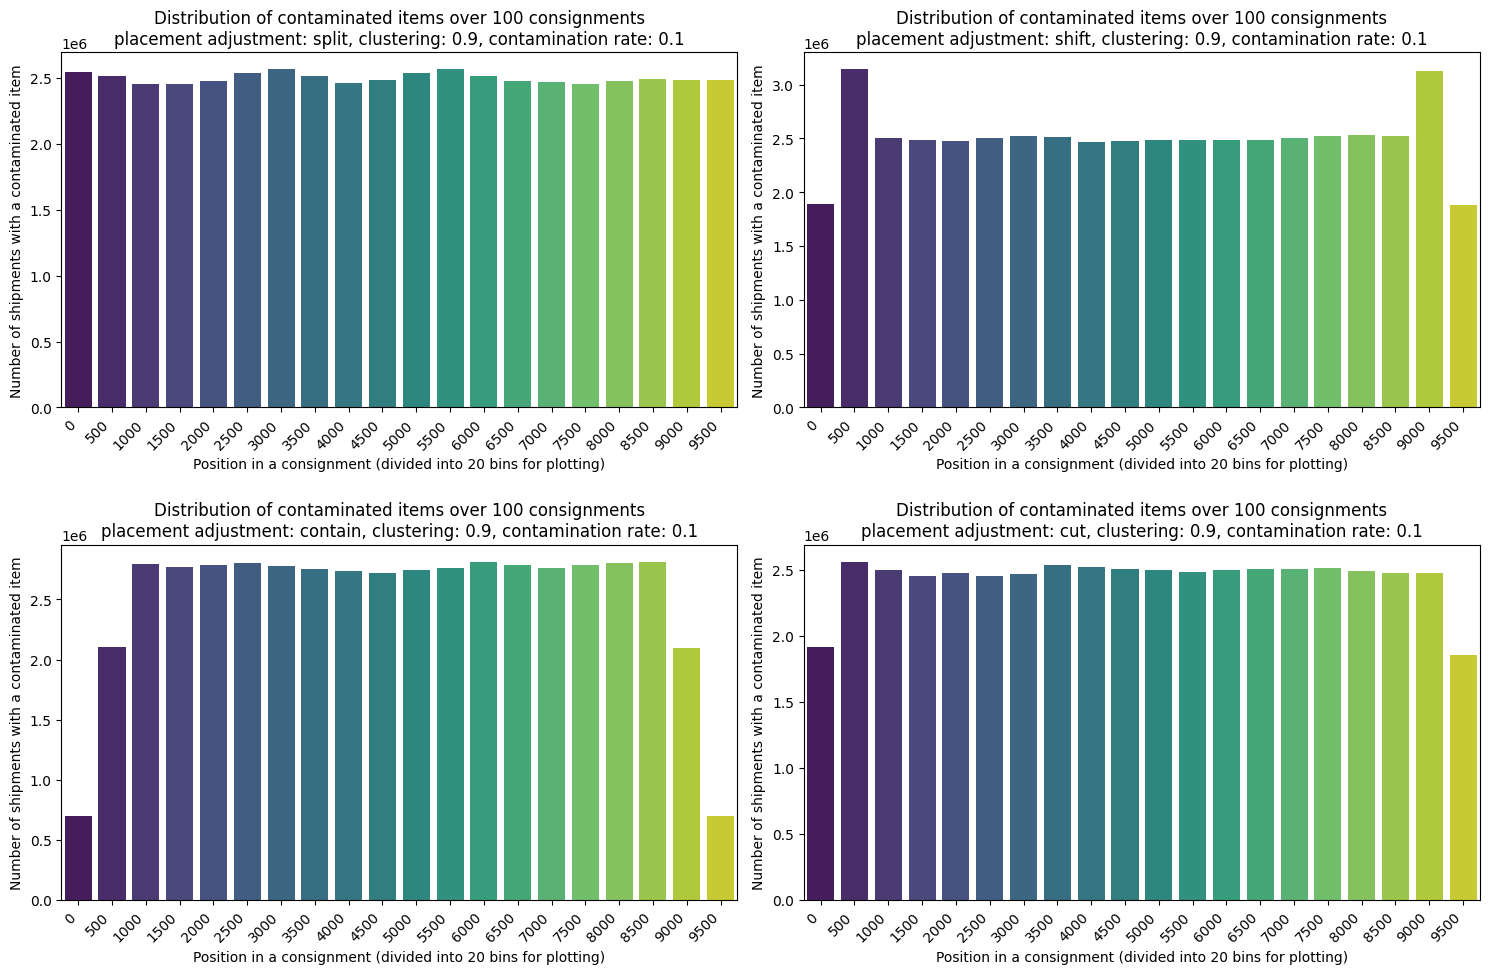

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for placement_number, placement_adjustment in enumerate(["split", "shift", "contain", "cut"]):
    print(placement_adjustment)
    config = load_configuration_yaml_from_text(
        config_yaml.format(
            contamination_rate=0.1,
            placement_adjustment=placement_adjustment,
            clustering=0.9,
            )
    )["contamination"]
    simulate(config)
plt.tight_layout()
plt.show()

## Exploring Distributions

In [11]:
# import seaborn
import seaborn as sns

# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={"figure.figsize": (5, 5)})

In [12]:
from scipy.stats import beta

infest_beta = beta.rvs(4, 60, size=10000)

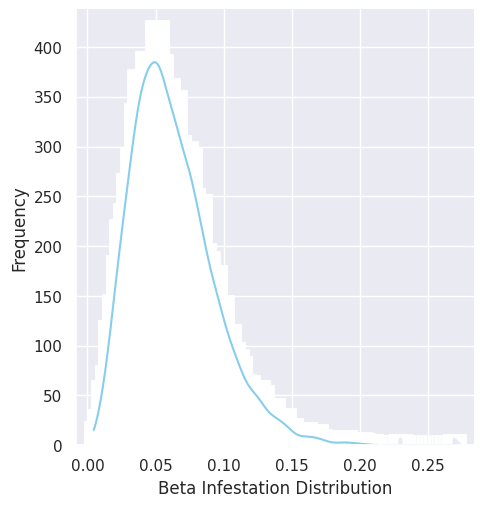

In [13]:
ax = sns.displot(
    infest_beta, kde=True, bins=100, color="skyblue", linewidth=15, alpha=1
)
ax.set(xlabel="Beta Infestation Distribution", ylabel="Frequency")

In [14]:
# Choose infestation rate for shipment from beta distribution
infest_rate = beta.rvs(4, 60, size=1)[0]
print("Infestation rate:", round(infest_rate, 4))

Infestation rate: 0.0331


In [15]:
num_stem = np.random.randint(1, high=1000000, size=1)[0]  # QUANTITY

# Calculate number of pests in shipment based on infestation rate.
num_pest = int(num_stem * infest_rate)
print("Num stems: ", int(num_stem))
print("Num pests:", num_pest)
np.arange(num_stem)

Num stems:  593526
Num pests: 19650


array([     0,      1,      2, ..., 593523, 593524, 593525],
      shape=(593526,))

In [16]:
# Infest stems using uniform distribution
infest_stem_unif = np.random.choice(int(num_stem), num_pest, replace=False)

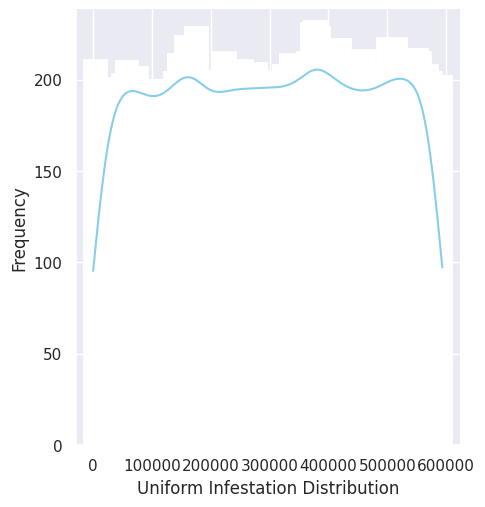

In [17]:
ax = sns.displot(
    infest_stem_unif, kde=True, bins=100, color="skyblue", linewidth=15, alpha=1
)
ax.set(xlabel="Uniform Infestation Distribution", ylabel="Frequency")

In [18]:
from scipy.stats import gamma

# Infest stems using gamma distribution to create cluster of pests.
infest_clust = gamma.rvs(
    3, scale=500, size=40000
)  # rvs(a, loc=0, scale=1, size=1, random_state=None)
infest_clust = [round(x) for x in infest_clust]

# Insert infested cluster of stems into shipment at random position
start_clust = np.random.randint(1, high=num_stem - max(infest_clust), size=1)
infest_stem_clust = infest_clust + start_clust

print("Size of cluster:", int(max(infest_stem_clust) - min(infest_stem_clust)), "stems")

Size of cluster: 9537 stems


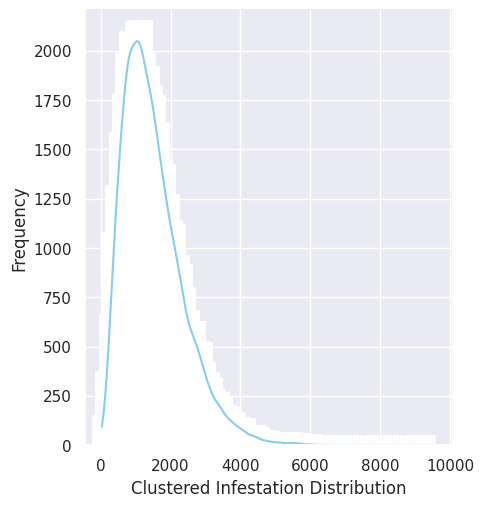

In [19]:
ax = sns.displot(
    infest_clust, kde=True, bins=100, color="skyblue", linewidth=15, alpha=1
)
ax.set(xlabel="Clustered Infestation Distribution", ylabel="Frequency")

In [20]:
num_boxes = math.ceil(num_stem / 200)
print(num_boxes)

2968
